## Exploratory Data Analysis
*for Health Insurance Cross Sell Prediction project*

#### Load Packages

In [3]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

#### Load Data

In [2]:
# Download train.csv data from GitHub
url = "https://raw.githubusercontent.com/ssears219/Health-Insurance-Cross-Sell-Prediction/main/Data/Kaggle%20Data/train.csv"
file = requests.get(url).content

# Read to pandas df
df = pd.read_csv(io.StringIO(file.decode('utf-8')))

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Response**: 12.3% of all records responded that they were interested  
**Age**: Cusomter were between 20 and 85 years old, averaging 39  
**Driving License**: 99.8% of customers had a license  
**Previously Insured**: 45.8% of customers had vehicle insurance  
**Annual Premium**: Average annual premium was 30,564 Rs  
**Vintage**: Average number of days customer has been associated with the company is 154  

### Interest by Gender

In [5]:
n = df.shape[0]
genders = df['Gender'].unique()
rates = []
proportions = []

for gender in genders:
    rate = df[(df['Response'] == 1) & (df['Gender'] == gender)].shape[0] / df[df['Gender'] == gender].shape[0]
    proportion = df[df['Gender'] == gender].shape[0] / n
    rates.append(rate)
    proportions.append(proportion)

weighted_int_rates = []
weighted_non_int_rates = []

for i in range(len(rates)):
    weighted_int_rates.append(rates[i]*proportions[i])
    weighted_non_int_rates.append((1-rates[i])*proportions[i])

interest_gender_df = pd.DataFrame({'Gender':genders, 'Interest Rate': rates, 'Weighted Interested Rate': weighted_int_rates,
                               'Weighted Not Interested Rate': weighted_non_int_rates, 'Proportion': proportions})

interest_gender_df

,Gender,Interest Rate,Weighted Interested Rate,Weighted Not Interested Rate,Proportion
0,Male,0.138411,0.074847,0.465914,0.540761
1,Female,0.103902,0.047716,0.411523,0.459239


In [ ]:
# Export to Excel
interest_gender_df.to_excel('interest_by_gender.xlsx')

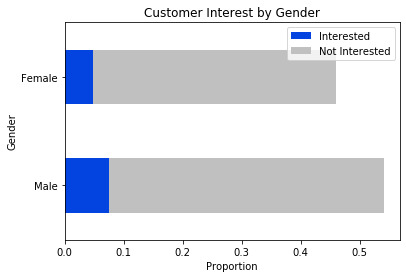

In [6]:
chart_df = interest_gender_df[['Gender', 'Weighted Interested Rate', 'Weighted Not Interested Rate']].set_index('Gender')

ax = chart_df.plot(kind='barh',
                   stacked=True,
                   label="Series",
                   color=['#0343DF','#C0C0C0'])

ax.set_xlabel('Proportion')
ax.set_ylabel('Gender')
ax.set_title('Customer Interest by Gender')
ax.legend(loc=1,
          labels = ['Interested', 'Not Interested'])

plt.show()

### Interest by Age

In [7]:
age_ranges = []
rates = []
proportions = []

for age in range(20, 81, 5):
    rate = df[(df['Response'] == 1) & (df['Age'] >= age) & (df['Age'] < age+5)].shape[0]\
           / df[(df['Age'] >= age) & (df['Age'] < age+5)].shape[0]
    proportion = df[(df['Age'] >= age) & (df['Age'] < age+5)].shape[0] / n
    
    age_ranges.append("{}-{}".format(age, age+5))
    rates.append(rate)
    proportions.append(proportion)
    

weighted_int_rates = []
weighted_non_int_rates = []

for i in range(len(rates)):
    weighted_int_rates.append(rates[i]*proportions[i])
    weighted_non_int_rates.append((1-rates[i])*proportions[i])
    
interest_age_df = pd.DataFrame({'Age Range':age_ranges, 'Interest Rate': rates, 'Weighted Interested Rate': weighted_int_rates,
                               'Weighted Not Interested Rate': weighted_non_int_rates, 'Proportion': proportions})

interest_age_df

,Age Range,Interest Rate,Weighted Interested Rate,Weighted Not Interested Rate,Proportion
0,20-25,0.035294,0.008693,0.237612,0.246305
1,25-30,0.049907,0.008032,0.152904,0.160936
2,30-35,0.178420,0.012487,0.057501,0.069988
3,35-40,0.221066,0.015998,0.056370,0.072368
4,40-45,0.212366,0.022125,0.082058,0.104183
5,45-50,0.212353,0.020695,0.076760,0.097455
6,50-55,0.187749,0.013841,0.059881,0.073722
7,55-60,0.161601,0.008454,0.043861,0.052316
8,60-65,0.125935,0.005258,0.036496,0.041754
9,65-70,0.100763,0.003466,0.030933,0.034400


In [ ]:
# Export to Excel
interest_age_df.to_excel('interest_by_age.xlsx')

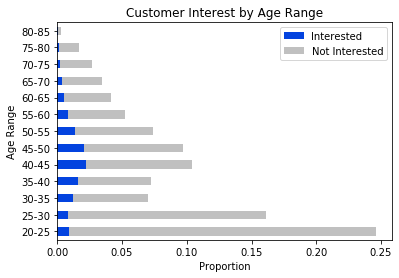

In [8]:
chart_df = interest_age_df[['Age Range', 'Weighted Interested Rate', 'Weighted Not Interested Rate']].set_index('Age Range')

ax = chart_df.plot(kind='barh',
                   stacked=True,
                   label="Series",
                   color=['#0343DF','#C0C0C0'])

ax.set_xlabel('Proportion')
ax.set_ylabel('Age Range')
ax.set_title('Customer Interest by Age Range')
ax.legend(loc=1,
          labels = ['Interested', 'Not Interested'])

plt.show()

### Interest by Driving License

In [9]:
dl_resp = df['Driving_License'].unique()
rates = []
proportions = []

for response in dl_resp:
    rate = df[(df['Response'] == 1) & (df['Driving_License'] == response)].\
           shape[0] / df[df['Driving_License'] == response].shape[0]
    proportion = df[df['Driving_License'] == response].shape[0] / n
    rates.append(rate)
    proportions.append(proportion)

weighted_int_rates = []
weighted_non_int_rates = []

for i in range(len(rates)):
    weighted_int_rates.append(rates[i]*proportions[i])
    weighted_non_int_rates.append((1-rates[i])*proportions[i])

interest_dl_df = pd.DataFrame({'Drivers License': dl_resp, 'Interest Rate': rates,
                                'Weighted Interested Rate': weighted_int_rates,
                                'Weighted Not Interested Rate': weighted_non_int_rates,
                                'Proportion': proportions})

interest_dl_df['Drivers License'] = interest_dl_df['Drivers License'].map({0: 'No', 1: 'Yes'})
interest_dl_df

,Drivers License,Interest Rate,Weighted Interested Rate,Weighted Not Interested Rate,Proportion
0,Yes,0.122717,0.122456,0.875414,0.997869
1,No,0.050493,0.000108,0.002023,0.002131


In [ ]:
# Export to Excel
interest_dl_df.to_excel('interest_by_dl.xlsx')

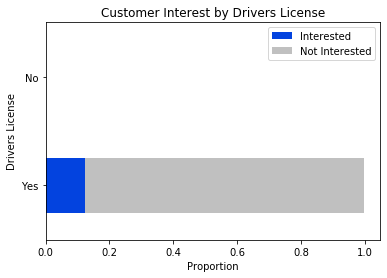

In [10]:
chart_df = interest_dl_df[['Drivers License', 'Weighted Interested Rate', 'Weighted Not Interested Rate']].\
           set_index('Drivers License')

ax = chart_df.plot(kind='barh',
                   stacked=True,
                   label="Series",
                   color=['#0343DF','#C0C0C0'])

ax.set_xlabel('Proportion')
ax.set_ylabel('Drivers License')
ax.set_title('Customer Interest by Drivers License')
ax.legend(loc=1,
          labels = ['Interested', 'Not Interested'])

plt.show()

### Interest by Region Code

In [11]:
regions = df['Region_Code'].unique()
regions.sort()
rates = []
proportions = []

for region in regions:
    rate = df[(df['Response'] == 1) & (df['Region_Code'] == region)].shape[0]\
           / df[df['Region_Code'] == region].shape[0]
    proportion = df[df['Region_Code'] == region].shape[0] / n
    
    rates.append(rate)
    proportions.append(proportion)
    
weighted_int_rates = []
weighted_non_int_rates = []

for i in range(len(rates)):
    weighted_int_rates.append(rates[i]*proportions[i])
    weighted_non_int_rates.append((1-rates[i])*proportions[i])
    
interest_region_df = pd.DataFrame({'Region':regions, 'Interest Rate': rates,
                                   'Weighted Interested Rate': weighted_int_rates,
                                   'Weighted Not Interested Rate': weighted_non_int_rates,
                                   'Proportion': proportions})

interest_region_df
    

,Region,Interest Rate,Weighted Interested Rate,Weighted Not Interested Rate,Proportion
0,0.0,0.086096,0.000457,0.004846,0.005303
1,1.0,0.108135,0.000286,0.002359,0.002645
2,2.0,0.071075,0.000753,0.009842,0.010595
3,3.0,0.127662,0.003099,0.021175,0.024274
4,4.0,0.158245,0.000748,0.003978,0.004726
5,5.0,0.115715,0.000388,0.002968,0.003356
6,6.0,0.069904,0.001152,0.015326,0.016478
7,7.0,0.131747,0.001134,0.007470,0.008604
8,8.0,0.096142,0.008546,0.080344,0.088891
9,9.0,0.081587,0.000664,0.007473,0.008137


In [ ]:
# Export to Excel
interest_region_df.to_excel('interest_by_region.xlsx')

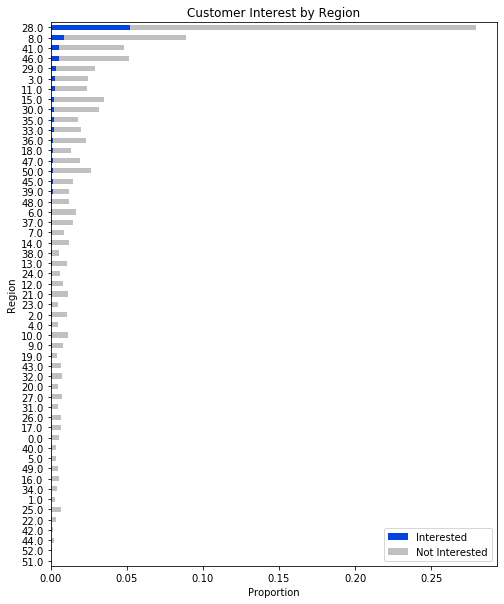

In [12]:
chart_df = interest_region_df[['Region', 'Weighted Interested Rate', 'Weighted Not Interested Rate']].set_index('Region')
chart_df.sort_values(by=['Weighted Interested Rate'], ascending=True, inplace=True)

ax = chart_df.plot(kind='barh',
                   stacked=True,
                   label="Series",
                   color=['#0343DF','#C0C0C0'],
                   figsize=(8, 10))

ax.set_xlabel('Proportion')
ax.set_ylabel('Region')
ax.set_title('Customer Interest by Region')
ax.legend(loc=4,
          labels = ['Interested', 'Not Interested'])

plt.show()

### Interest by Previously Insured

In [13]:
prev_ins = df['Previously_Insured'].unique()
rates = []
proportions = []

for response in prev_ins:
    rate = df[(df['Response'] == 1) & (df['Previously_Insured'] == response)].\
           shape[0] / df[df['Previously_Insured'] == response].shape[0]
    proportion = df[df['Previously_Insured'] == response].shape[0] / n
    rates.append(rate)
    proportions.append(proportion)

weighted_int_rates = []
weighted_non_int_rates = []

for i in range(len(rates)):
    weighted_int_rates.append(rates[i]*proportions[i])
    weighted_non_int_rates.append((1-rates[i])*proportions[i])

interest_prev_ins_df = pd.DataFrame({'Previously Insured': prev_ins, 'Interest Rate': rates,
                                'Weighted Interested Rate': weighted_int_rates,
                                'Weighted Not Interested Rate': weighted_non_int_rates,
                                'Proportion': proportions})


interest_prev_ins_df['Previously Insured'] = interest_prev_ins_df['Previously Insured'].map({0: 'No', 1: 'Yes'})
interest_prev_ins_df

,Previously Insured,Interest Rate,Weighted Interested Rate,Weighted Not Interested Rate,Proportion
0,No,0.225454,0.122149,0.419641,0.54179
1,Yes,0.000905,0.000415,0.457796,0.45821


In [ ]:
# Export to Excel
interest_prev_ins_df.to_excel('interest_by_previously_insd.xlsx')

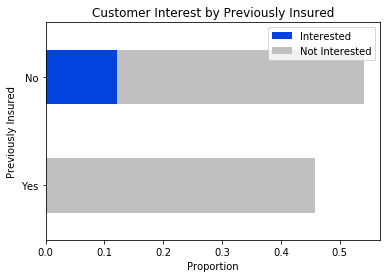

In [14]:
chart_df = interest_prev_ins_df[['Previously Insured', 'Weighted Interested Rate',
                                 'Weighted Not Interested Rate']].set_index('Previously Insured')

chart_df.sort_values(by=['Weighted Interested Rate'], ascending=True, inplace=True)

ax = chart_df.plot(kind='barh',
                   stacked=True,
                   label="Series",
                   color=['#0343DF','#C0C0C0'])

ax.set_xlabel('Proportion')
ax.set_ylabel('Previously Insured')
ax.set_title('Customer Interest by Previously Insured')
ax.legend(loc=1,
          labels = ['Interested', 'Not Interested'])

plt.show()

### Interest by Vehicle Age

In [15]:
ages = df['Vehicle_Age'].unique()
regions.sort()
rates = []
proportions = []

for age in ages:
    rate = df[(df['Response'] == 1) & (df['Vehicle_Age'] == age)].shape[0]\
           / df[df['Vehicle_Age'] == age].shape[0]
    proportion = df[df['Vehicle_Age'] == age].shape[0] / n
    
    rates.append(rate)
    proportions.append(proportion)
    
weighted_int_rates = []
weighted_non_int_rates = []

for i in range(len(rates)):
    weighted_int_rates.append(rates[i]*proportions[i])
    weighted_non_int_rates.append((1-rates[i])*proportions[i])
    
interest_veh_age_df = pd.DataFrame({'Vehicle Age':ages, 'Interest Rate': rates,
                                   'Weighted Interested Rate': weighted_int_rates,
                                   'Weighted Not Interested Rate': weighted_non_int_rates,
                                   'Proportion': proportions})

interest_veh_age_df

,Vehicle Age,Interest Rate,Weighted Interested Rate,Weighted Not Interested Rate,Proportion
0,> 2 Years,0.293746,0.012338,0.029663,0.042001
1,1-2 Year,0.173755,0.091328,0.434285,0.525613
2,< 1 Year,0.043705,0.018897,0.413488,0.432385


In [ ]:
# Export to Excel
interest_veh_age_df.to_excel('interest_by_vehicle_age.xlsx')

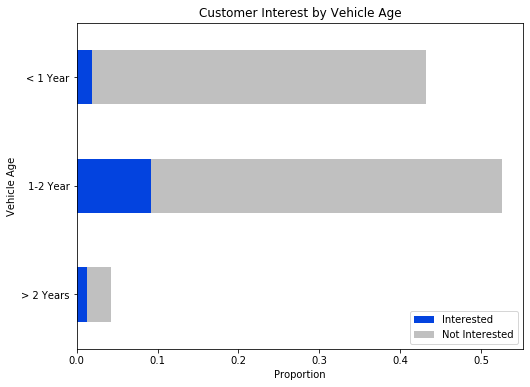

In [16]:
chart_df = interest_veh_age_df[['Vehicle Age', 'Weighted Interested Rate', 'Weighted Not Interested Rate']].\
                                set_index('Vehicle Age')

ax = chart_df.plot(kind='barh',
                   stacked=True,
                   label="Series",
                   color=['#0343DF','#C0C0C0'],
                   figsize=(8, 6))

ax.set_xlabel('Proportion')
ax.set_ylabel('Vehicle Age')
ax.set_title('Customer Interest by Vehicle Age')
ax.legend(loc=4,
          labels = ['Interested', 'Not Interested'])

plt.show()

### Interest by Vehicle Damage

In [17]:
damages = df['Vehicle_Damage'].unique()
regions.sort()
rates = []
proportions = []

for damage in damages:
    rate = df[(df['Response'] == 1) & (df['Vehicle_Damage'] == damage)].shape[0]\
           / df[df['Vehicle_Damage'] == damage].shape[0]
    proportion = df[df['Vehicle_Damage'] == damage].shape[0] / n
    
    rates.append(rate)
    proportions.append(proportion)
    
weighted_int_rates = []
weighted_non_int_rates = []

for i in range(len(rates)):
    weighted_int_rates.append(rates[i]*proportions[i])
    weighted_non_int_rates.append((1-rates[i])*proportions[i])
    
interest_damage_df = pd.DataFrame({'Vehicle Damage':damages, 'Interest Rate': rates,
                                   'Weighted Interested Rate': weighted_int_rates,
                                   'Weighted Not Interested Rate': weighted_non_int_rates,
                                   'Proportion': proportions})

interest_damage_df

,Vehicle Damage,Interest Rate,Weighted Interested Rate,Weighted Not Interested Rate,Proportion
0,Yes,0.237655,0.119987,0.384890,0.504877
1,No,0.005204,0.002577,0.492547,0.495123


In [ ]:
# Export to Excel
interest_damage_df.to_excel('interest_by_vehicle_damage.xlsx')

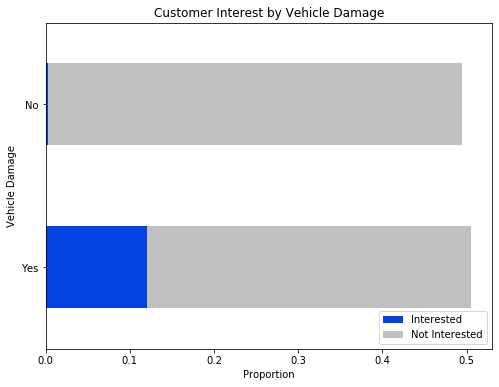

In [18]:
chart_df = interest_damage_df[['Vehicle Damage', 'Weighted Interested Rate', 'Weighted Not Interested Rate']].\
           set_index('Vehicle Damage')

ax = chart_df.plot(kind='barh',
                   stacked=True,
                   label="Series",
                   color=['#0343DF','#C0C0C0'],
                   figsize=(8, 6))

ax.set_xlabel('Proportion')
ax.set_ylabel('Vehicle Damage')
ax.set_title('Customer Interest by Vehicle Damage')
ax.legend(loc=4,
          labels = ['Interested', 'Not Interested'])

plt.show()

### Interest by Annual Premium

In [19]:
premium_ranges = []
rates = []
proportions = []

for premium in range(2000, 50001, 6000):
    if premium == 50000:
        rate = df[(df['Response'] == 1) & (df['Annual_Premium'] >= premium)].shape[0]\
           / df[df['Annual_Premium'] >= premium].shape[0]
        proportion = df[df['Annual_Premium'] >= premium].shape[0] / n
        premium_ranges.append(">{}".format(premium))
        
    else:
        rate = df[(df['Response'] == 1) & (df['Annual_Premium'] >= premium) & (df['Annual_Premium'] < premium+6000)].shape[0]\
           / df[(df['Annual_Premium'] >= premium) & (df['Annual_Premium'] < premium+6000)].shape[0]
        proportion = df[(df['Annual_Premium'] >= premium) & (df['Annual_Premium'] < premium+6000)].shape[0] / n
        premium_ranges.append("{}-{}".format(premium, premium+6000))

    rates.append(rate)
    proportions.append(proportion)
    
weighted_int_rates = []
weighted_non_int_rates = []

for i in range(len(rates)):
    weighted_int_rates.append(rates[i]*proportions[i])
    weighted_non_int_rates.append((1-rates[i])*proportions[i])

interest_premium_df = pd.DataFrame({'Premium': premium_ranges, 'Interest Rate': rates,
                                    'Weighted Interested Rate': weighted_int_rates,
                                    'Weighted Not Interested Rate': weighted_non_int_rates,
                                    'Proportion': proportions})

interest_premium_df

,Premium,Interest Rate,Weighted Interested Rate,Weighted Not Interested Rate,Proportion
0,2000-8000,0.131090,0.022316,0.147921,0.170237
1,8000-14000,0.060440,0.000029,0.000449,0.000478
2,14000-20000,0.079317,0.001170,0.013584,0.014754
3,20000-26000,0.094717,0.010170,0.097206,0.107376
4,26000-32000,0.106116,0.023295,0.196230,0.219525
5,32000-38000,0.120026,0.024061,0.176406,0.200468
6,38000-44000,0.138369,0.017761,0.110601,0.128362
7,44000-50000,0.146798,0.010905,0.063381,0.074286
8,>50000,0.152100,0.012855,0.071659,0.084514


In [ ]:
# Export to Excel
interest_premium_df.to_excel('interest_by_premium.xlsx')

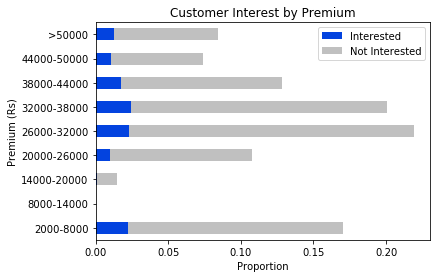

In [21]:
chart_df = interest_premium_df[['Premium', 'Weighted Interested Rate',
                                 'Weighted Not Interested Rate']].set_index('Premium')

ax = chart_df.plot(kind='barh',
                   stacked=True,
                   label="Series",
                   color=['#0343DF','#C0C0C0'])

ax.set_xlabel('Proportion')
ax.set_ylabel('Premium (Rs)')
ax.set_title('Customer Interest by Premium')
ax.legend(loc=1,
          labels = ['Interested', 'Not Interested'])

plt.show()

### Interest by Sales Channel

In [22]:
sales_channels = df['Policy_Sales_Channel'].unique()
sales_channels.sort()
rates = []
proportions = []

for channel in sales_channels:
    rate = df[(df['Response'] == 1) & (df['Policy_Sales_Channel'] == channel)].shape[0]\
           / df[df['Policy_Sales_Channel'] == channel].shape[0]
    proportion = df[df['Policy_Sales_Channel'] == channel].shape[0] / n
    
    rates.append(rate)
    proportions.append(proportion)
    
weighted_int_rates = []
weighted_non_int_rates = []

for i in range(len(rates)):
    weighted_int_rates.append(rates[i]*proportions[i])
    weighted_non_int_rates.append((1-rates[i])*proportions[i])

interest_channel_df = pd.DataFrame({'Sales Channel': sales_channels, 'Interest Rate': rates,
                                    'Weighted Interested Rate': weighted_int_rates,
                                    'Weighted Not Interested Rate': weighted_non_int_rates,
                                    'Proportion': proportions})

interest_channel_df

,Sales Channel,Interest Rate,Weighted Interested Rate,Weighted Not Interested Rate,Proportion
0,1.0,0.032588,0.000092,0.002726,0.002818
1,2.0,0.250000,0.000003,0.000008,0.000010
2,3.0,0.304015,0.000417,0.000955,0.001372
3,4.0,0.200393,0.000268,0.001068,0.001336
4,6.0,0.000000,0.000000,0.000008,0.000008
...,...,...,...,...,...
150,157.0,0.268402,0.004707,0.012831,0.017538
151,158.0,0.274390,0.000354,0.000937,0.001291
152,159.0,0.019608,0.000003,0.000131,0.000134
153,160.0,0.021810,0.001246,0.055900,0.057146


In [ ]:
# Export to Excel
interest_channel_df.to_excel('interest_by_channel.xlsx')

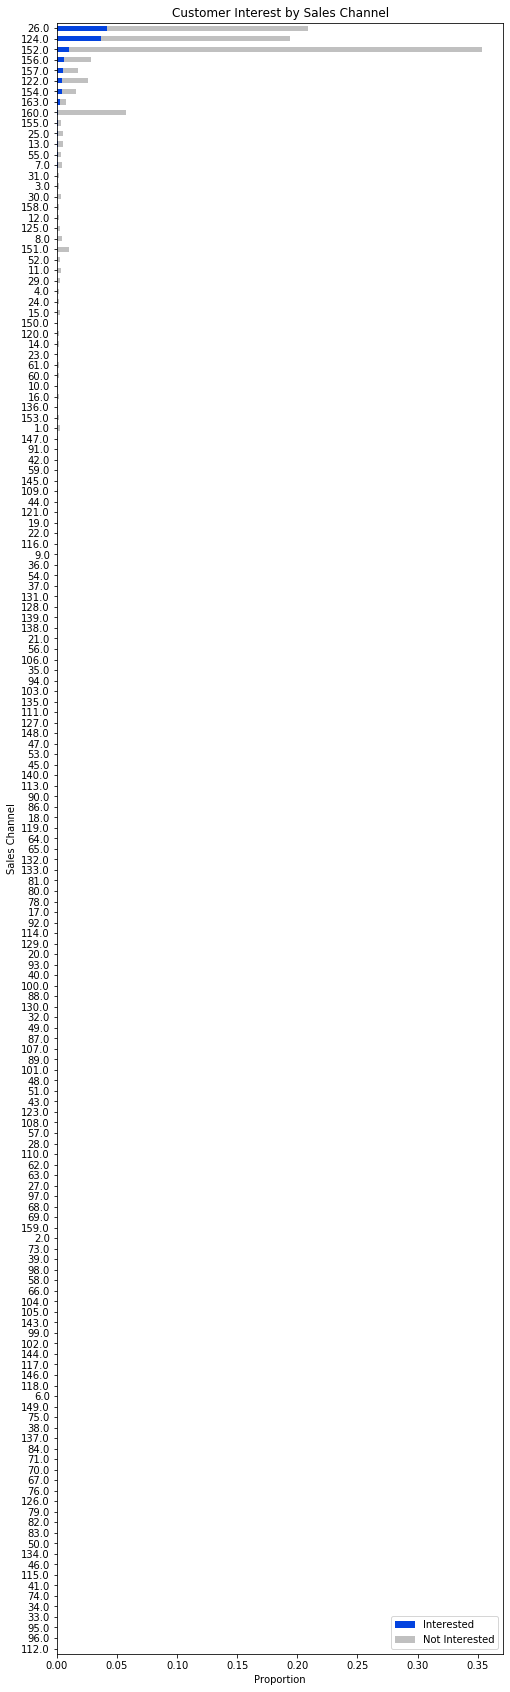

In [23]:
chart_df = interest_channel_df[['Sales Channel', 'Weighted Interested Rate',
                                'Weighted Not Interested Rate']].set_index('Sales Channel')
chart_df.sort_values(by=['Weighted Interested Rate'], ascending=True, inplace=True)

ax = chart_df.plot(kind='barh',
                   stacked=True,
                   label="Series",
                   color=['#0343DF','#C0C0C0'],
                   figsize=(8, 30))

ax.set_xlabel('Proportion')
ax.set_ylabel('Sales Channel')
ax.set_title('Customer Interest by Sales Channel')
ax.legend(loc=4,
          labels = ['Interested', 'Not Interested'])

plt.show()

### Interest Rate by Vintage

In [24]:
vintage_ranges = []
rates = []
proportions = []
step=12

for vintage in range(10, 296, step):
    rate = df[(df['Response'] == 1) & (df['Vintage'] >= vintage) & (df['Vintage'] < vintage+step)].shape[0]\
           / df[(df['Vintage'] >= vintage) & (df['Vintage'] < vintage+step)].shape[0]
    proportion = df[(df['Vintage'] >= vintage) & (df['Vintage'] < vintage+step)].shape[0] / n
    
    if vintage == 286:
        vintage_ranges.append(">{}".format(vintage))        
    else: 
        vintage_ranges.append("{}-{}".format(vintage, vintage+15))
    
    rates.append(rate)
    proportions.append(proportion)
    
weighted_int_rates = []
weighted_non_int_rates = []

for i in range(len(rates)):
    weighted_int_rates.append(rates[i]*proportions[i])
    weighted_non_int_rates.append((1-rates[i])*proportions[i])

interest_vintage_df = pd.DataFrame({'Vintage': vintage_ranges, 'Interest Rate': rates,
                                    'Weighted Interested Rate': weighted_int_rates,
                                    'Weighted Not Interested Rate': weighted_non_int_rates,
                                    'Proportion': proportions})

interest_vintage_df  

,Vintage,Interest Rate,Weighted Interested Rate,Weighted Not Interested Rate,Proportion
0,10-25,0.126732,0.005161,0.035565,0.040726
1,22-37,0.121163,0.005075,0.036808,0.041883
2,34-49,0.126994,0.005306,0.036473,0.041778
3,46-61,0.124466,0.005125,0.036047,0.041172
4,58-73,0.121468,0.005020,0.036305,0.041324
5,70-85,0.117504,0.004951,0.037186,0.042138
6,82-97,0.122515,0.005046,0.036139,0.041185
7,94-109,0.118509,0.004922,0.036614,0.041537
8,106-121,0.120433,0.005025,0.036698,0.041723
9,118-133,0.123828,0.005127,0.036278,0.041405


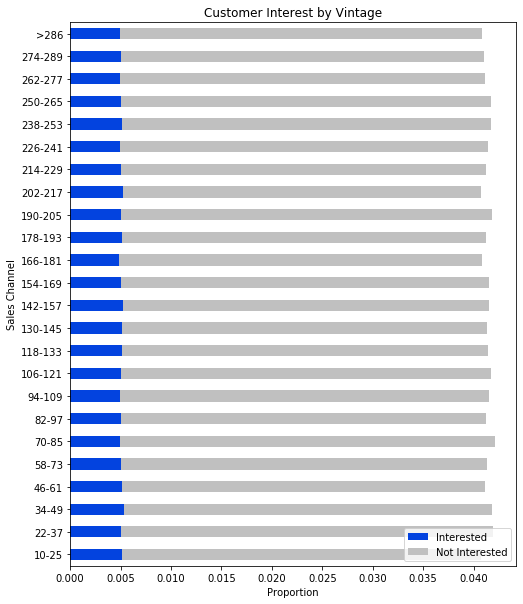

In [25]:
chart_df = interest_vintage_df[['Vintage', 'Weighted Interested Rate',
                                'Weighted Not Interested Rate']].set_index('Vintage')

ax = chart_df.plot(kind='barh',
                   stacked=True,
                   label="Series",
                   color=['#0343DF','#C0C0C0'],
                   figsize=(8, 10))

ax.set_xlabel('Proportion')
ax.set_ylabel('Sales Channel')
ax.set_title('Customer Interest by Vintage')
ax.legend(loc=4,
          labels = ['Interested', 'Not Interested'])

plt.show()

### Profiling Report

*Dependency: PyCaret*

In [4]:
prof = ProfileReport(df)
prof.to_file(output_file='HealthInsuranceCrossSell_ProfileReport.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]